# Load Dataset

In [1]:
from glob import glob
import random

In [2]:
files = glob('../BEST I Corpus/*/*')
print('Number of files: ', len(files))

Number of files:  506


### Get Sample Data for Training
Select **10** file by random

In [3]:
nb_files_sample = 10
files_sample = random.choices(files, k=nb_files_sample)
print('Number of sample files: ', len(files_sample))

Number of sample files:  10


In [4]:
files_sample  # display file list

['../BEST I Corpus\\novel\\novel_00051.txt',
 '../BEST I Corpus\\news\\news_00027.txt',
 '../BEST I Corpus\\article\\article_00116.txt',
 '../BEST I Corpus\\novel\\novel_00077.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00086.txt',
 '../BEST I Corpus\\news\\news_00021.txt',
 '../BEST I Corpus\\news\\news_00015.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00098.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00038.txt',
 '../BEST I Corpus\\article\\article_00079.txt']

# Text Preprocessing
1. Text to **lower-case**
2. Remove **ab, /ab, ne, /ne** tag and **'|'**
3. and use **newmm** tokenizer for  word segmentation

In [6]:
from pythainlp import word_tokenize

In [7]:
def replace(text, wordlist):
    for new_word, list_ in wordlist.items():
        for old_word in list_:
            text = text.replace(old_word.lower(), new_word)
    return text

    
def prepare_text(text, wordlist):
    text = text.lower()
    text = replace(text, wordlist)
    words = word_tokenize(text, engine='newmm')
    return '|'.join(words) + '|'

In [5]:
texts = []
for fpath in files_sample:
    with open(fpath, mode='r', encoding="utf8") as file:
        text = file.read().lower()  # read file and to lower-case
        texts.append(text)

In [8]:
wordlist = {
    ' ': ['<AB>', '</AB>', '<NE>', '</NE>'],
    '': ['|'],
}

texts = [prepare_text(text, wordlist) for text in texts]

In [9]:
# sample text
print(texts[0])

1|
|เสียง|ปืน|ที่|ดัง|มาจาก|หนองน้ำ|เป็นระยะ|บอก|ชัด|ว่า|คณะ|ล่า|เป็ดน้ำ|กำลัง|ทำหน้าที่|เพชฌฆาต|อย่าง|ขะมักเขม้น|ฉัน|นอน|เหยียดยาว|อยู่|บน|เก้าอี้| |แหงน|ดู|ท้องฟ้า|สี|คราม|เบื้องบน|พลาง|สงสัย|ว่า|วันที่|อากาศ|ดี|อย่างนี้| |ทำไม|กลายเป็น|วัน|เลวร้าย|ที่สุด|ของ|เจ้า|นก|เป็ดน้ำ|ไป|ได้|
|"|กีฬา|!"|
|ผู้คน|มัก|อ้าง|อย่างนั้น| |อะไรก็ตาม|ที่|ทำให้| |"คน"| |เกิด|ความสนุก| |จัด|ว่า|เป็น|กีฬา|เสีย|ทั้งสิ้น| |โดย|ไม่|คิด|ว่า|จะ|เป็น|ความทุกข์ยาก|ของ|ใคร| |ล้า| |"คน"| |ถู|กล่า|บ้าง|เล่า|จะ|กลายเป็น|กีฬา|บ้าง|หรือเปล่า|...|
|"|เป็น|!"| |พี่ชาย|ฉัน|บอก|อย่าง|หนักแน่น|
|"|สมัย|โรมัน|ใช้|สัตว์|ล่า|คน| |ก็|จัด|ว่า|เป็น|เกม|กีฬา| |ยุค|นี้|คน|ก็|กำลัง|ล่า|คน| |แต่|เขา|เรียกกันว่า|เกม|การเมือง|!"|
|ฉัน|หน่าย|ต่อ|คำ|ว่า| |"|การเมือง|"| |เต็มทน| |ทั้งๆ ที่|ตระกูล|เรา|เป็น|นัก|การธนาคาร|แท้ๆ| |แต่|การเงิน|กับ|การเมือง|ก็|พัวพัน|กัน|ตลอดมา|
|"|อำนาจ|นั้น|หรือ|?"|
|สีหน้า|พ่อ|แสดง|ความ|ดูหมิ่นดูแคลน|
|"|ถ้า|ไม่มี|การเงิน|หนุนหลัง|ก็|อยู่|ไม่ได้|นาน|"|
|"|แล้ว|นัก|การเงิน|อย่าง|เรา|ล่ะ|คะ|พ่อ|?"|
|"|เรา|ก็|ต

|


# Create Dictionary
Create dictionary for covert **char to int**, **int to char**

In [10]:
# Merge text for create unique chars dictionary
merge_texts = []
for text in texts:
    merge_texts += text

In [11]:
CHARS = sorted(list(set(merge_texts)))
CHAR_INDICES = dict((c, i) for i, c in enumerate(CHARS))
INDICES_CHAR = dict((i, c) for i, c in enumerate(CHARS))

print(f'Unique chars: {len(CHARS)}')

Unique chars: 137


# Create Dataset

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

### Generate Dataset

In [13]:
SEQUENCE_LENGTH = 40
sentences = []
next_chars = []

for text in texts:
    for i in range(len(text) - SEQUENCE_LENGTH):
        sentences.append(text[i: i + SEQUENCE_LENGTH])
        next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'Number of training examples: {len(sentences)}')

Number of training examples: 562403


In [14]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(CHARS)), dtype=np.bool)
y = np.zeros((len(sentences), len(CHARS)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, CHAR_INDICES[char]] = 1
    y[i, CHAR_INDICES[next_chars[i]]] = 1

### Train-Test Split
Train 70 %  
Test 30 %

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# data shape
print('Dataset'.center(20,'-'))
print('X shape: ', X.shape)
print('y shape: ', y.shape)

print('Train'.center(20,'-'))
print('X shape: ', X_train.shape)
print('y shape: ', y_train.shape)

print('Test'.center(20,'-'))
print('X shape: ', X_test.shape)
print('y shape: ', y_test.shape)

------Dataset-------
X shape:  (562403, 40, 137)
y shape:  (562403, 137)
-------Train--------
X shape:  (393682, 40, 137)
y shape:  (393682, 137)
--------Test--------
X shape:  (168721, 40, 137)
y shape:  (168721, 137)


# Create Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Bidirectional
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


In [19]:
    model = Sequential()
    model.add(
        Bidirectional(LSTM(n_uits, input_shape=input_shape,
                           return_sequences=False),
                      merge_mode='sum',
                      weights=None,
                      input_shape=input_shape))
    model.add(Dense(len(CHARS), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  # compile
    
    print('Total params: ', model.count_params())
    return model

Instructions for updating:
Colocations handled automatically by placer.
Total params:  842121


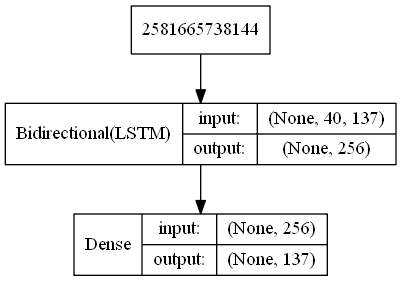

In [20]:
input_shape = X.shape[1:]
model = define_model(input_shape)  # define model

# plot model
image_name = 'model.png'
plot_model(model, image_name, show_shapes=True, show_layer_names=False)
display(Image(filename=image_name))

## Model Training

In [21]:
from livelossplot import PlotLossesKeras

callbacks_list = [PlotLossesKeras()]  # Callback config

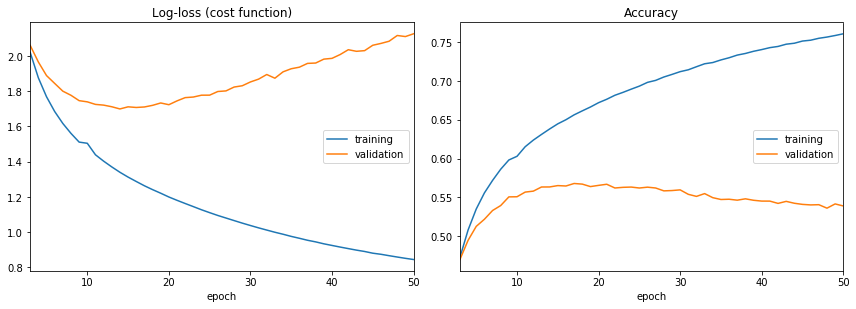

Log-loss (cost function):
training   (min:    0.845, max:    2.945, cur:    0.845)
validation (min:    1.699, max:    2.511, cur:    2.126)

Accuracy:
training   (min:    0.293, max:    0.761, cur:    0.761)
validation (min:    0.380, max:    0.568, cur:    0.539)


In [22]:
# training

history = model.fit(X, y, 
                    validation_split=0.2, 
                    batch_size=1024,
                    epochs=50,
                    shuffle=True,
                    callbacks=callbacks_list,
                    verbose=0)

# Model Evaluate

In [31]:
score, acc = model.evaluate(X_test, y_test, batch_size=1024)

print('Test score:', score)
print('Test accuracy:', acc)

Test score: 1.0761922552326992
Test accuracy: 0.7235732363371876


# Save to file

In [24]:
import json

def to_json(fname, data_dict):
    json_data = json.dumps(data_dict)
    with open(fname,'w') as file:
        file.write(json_data)

In [25]:
model.save('model.h5')

In [26]:
to_json('CHARS.json', CHARS)
to_json('CHAR_INDICES.json', CHAR_INDICES)
to_json('INDICES_CHAR.json', INDICES_CHAR)